# Tek Örneklem T Testi

In [1]:
import numpy as np

In [2]:
olcumler = np.array([17,160,234,149,145,107,197,75,201,225
                    ,157,145,211,119,127,244,163,114,145,65,112,185,202,146,
                    203,224,203,114,188,156,187,154,177,95,165,50,110,
                    216,138,151,166,135,155,84,251,173,131,207,121,120])

In [3]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [4]:
import scipy.stats as stats

In [5]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [6]:
#Varsayımlar
#Normallik Varsayımı

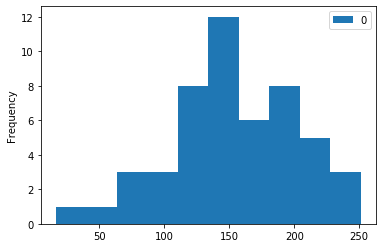

In [9]:
import pandas as pd
#Histogram
pd.DataFrame(olcumler).plot.hist();

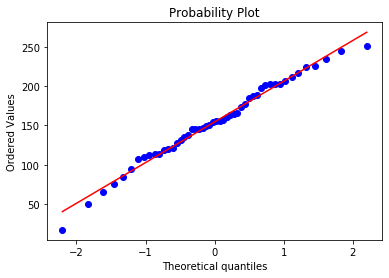

In [11]:
#qqplot
import pylab
stats.probplot(olcumler,dist="norm",plot=pylab)
pylab.show()

In [12]:
#Shapiro-Wilks Testi

H0: Örnek dağılımı ile teorik normal dağılım arasında istatiksel olarak anlamlı bir fark yoktur.
H1: Örnek dağılımı ile teorik normal dağılım arasında istatiksel olarak anlamlı bir fark vardır.

In [13]:
from scipy.stats import shapiro
shapiro(olcumler)

(0.9853105545043945, 0.7848747968673706)

In [14]:
print("T Hesap İstatistiği : " + str(shapiro(olcumler)[0]))
print("Hesaplanan P - Value : " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği : 0.9853105545043945
Hesaplanan P - Value : 0.7848747968673706


In [15]:
#Hipotez testi uygulaması

In [16]:
stats.ttest_1samp(olcumler,popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

H0 : web sitemizde geçirilen ortalma süre 170'tir
H1 : web sitemizde geçirilen ortalma süre 170 değildir.

## Nonparametrik Tek Örneklem Testi

In [17]:
from statsmodels.stats.descriptivestats import sign_test

In [18]:
sign_test(olcumler,170)

(-7.0, 0.06490864707227219)

## Tek Örneklem Oran Testi

In [19]:
# Oransal bir ifade test eldilmek isteildiğinde kullanılı

H0 : p=0.125
    
    
H0 : p!=0.125

In [20]:
from statsmodels.stats.proportion import proportions_ztest

In [21]:
count = 40
nobs = 500
value = 0.125

In [22]:
proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

## Bağımsız iki Örneklem T Testi

In [20]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,28,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,29,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
A_B = pd.concat([A,B],axis = 1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,29
2,21,31
3,27,31
4,29,34


In [21]:
#Normallik Varsayımı
from scipy.stats import shapiro

In [22]:
shapiro(A_B.A) # Sağ taraf 0.05 ten büyük ise reddedemiyoruz

(0.981905996799469, 0.8736521601676941)

In [23]:
shapiro(A_B.B)

(0.95292067527771, 0.20230072736740112)

In [24]:
# Varyans homejenliği varsayımı
import scipy.stats as stats
stats.levene(A_B.A, A_B.B) # p-Value değeri reddedemiyoruz diyor

LeveneResult(statistic=1.9048922340061571, pvalue=0.17282856320650103)

#### Hipotez Testi

In [25]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)# P-value 0.05ten küçükse H0 reddedilir.

Ttest_indResult(statistic=-6.785802761681411, pvalue=6.705199650917626e-09)

## Nonparametrik Bağımsız iki Örneklem Testi

In [26]:
# Varsayımlar sağlanmazsa kullanılır.

In [27]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=96.5, pvalue=8.450698608541391e-08)

# Bağımlı iki Örneklem T testi

In [2]:
import pandas as pd
# Bir iş yerinde eğitim verilmeden önce ve eğitim verildikten sonra ortaya çıkan veriler.
oncesi  = pd.DataFrame ([123,119,119,116,123,123,121,120,117,118,121,121,123,119, 121,118,124,121,125,115,115,119,118,121,117,117,120,120, 121,117,118,117,123,118,124,121,115,118,125,115])
sonrasi = pd.DataFrame ([118,127,122,132,129,123, 129,132,128,130,128,138,140,130, 134,134,124,140,134,129,129,138,134,124,122,126,133,127, 130, 130,130,132,117,130,125,129,133,120,127,123])

In [4]:
AYRIK = pd.concat([oncesi,sonrası],axis = 1)
AYRIK.columns = ["Oncesi","Sonrası"]
print("'Ayrık' Veri Seti: \n\n", AYRIK.head(),"\n\n")

'Ayrık' Veri Seti: 

    Oncesi  Sonrası
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 




In [5]:
#Varsayım Kontrolü

In [6]:
from scipy.stats import shapiro

In [7]:
shapiro(AYRIK.Oncesi) # sol taraf 0.05ten küçük değil. H0'ı reddedemiyoruz

(0.9543656706809998, 0.10722451657056808)

In [8]:
shapiro(AYRIK.Sonrası) # sol taraf 0.05ten küçük değil. H0'ı reddedemiyoruz

(0.9780089259147644, 0.6159515380859375)

In [10]:
import scipy.stats as stats
stats.levene(AYRIK.Oncesi,AYRIK.Sonrası) # p-value 0.05ten küçük olduğu için h0 hipotezi reddedilir.

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [11]:
# Hipotez testi

In [12]:
stats.ttest_rel(AYRIK.Oncesi,AYRIK.Sonrası) # p-value 0.05ten küçük olduğu için ho hipotezi reddedilir yani eğitim işe yaramıştır

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

### Nonparametrik Bağımlı iki Örneklem Testi

In [15]:
stats.wilcoxon(AYRIK.Oncesi,AYRIK.Sonrası) # pvalue 0.05ten küçük bu yüzden h0 reddedilir.

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

## İki Örneklem Oran testi

In [18]:
from statsmodels.stats.proportion import proportions_ztest

In [19]:
import numpy as np
basari_sayisi = np.array([300,250])
gozlem_sayisi = np.array([1000,1100])

In [21]:
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayisi) # h0 reddedilir.İki oran arasında anlamlı bir fark vardı

(3.7857863233209255, 0.0001532232957772221)

## Varyans Analizi

In [24]:
A = pd.DataFrame ([28,33,30,29,28,29,27,31,30, 32,28,33,25,29,27,31,31,30, 31,34, 30, 32, 31])
B = pd.DataFrame ([31,32,30,30,33,32,34,27, 36, 30, 31,30, 38, 29, 30, 34,34,31,35, 35,  33, 30, 29]) 
C = pd.DataFrame ([40,33,38,41,42,43,38,35,39, 39, 36,34,35,40, 38, 36, 39, 36, 33 , 35, 38, 35, 40]) 
dfs= [A, B, C]
ABC = pd.concat(dfs, axis = 1)
ABC.columns=["GROUP_A", "GROUP_B", "GROUP_C"] 
ABC.head()

,GROUP_A,GROUP_B,GROUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


In [25]:
# Varsayım Kontrolü

In [26]:
shapiro(ABC["GROUP_A"])

(0.977165162563324, 0.8526773452758789)

In [28]:
shapiro(ABC["GROUP_B"])

(0.9574949145317078, 0.4146973788738251)

In [29]:
shapiro(ABC["GROUP_C"])

(0.9604302644729614, 0.4721103310585022)

In [30]:
stats.levene(ABC["GROUP_A"],ABC["GROUP_B"],ABC["GROUP_C"])

LeveneResult(statistic=0.9079365079365083, pvalue=0.4083335776601478)

In [31]:
# HİPOTEZ TESTI

In [32]:
from scipy.stats import f_oneway

In [33]:
f_oneway(ABC["GROUP_A"],ABC["GROUP_B"],ABC["GROUP_C"])

F_onewayResult(statistic=54.117611580217186, pvalue=1.223103832038015e-14)

In [34]:
# H0 hipotezi reddedildi çünkü pvalue 0.05ten küçük

In [36]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GROUP_A,23.0,29.956522,2.184205,25.0,28.5,30.0,31.0,34.0
GROUP_B,23.0,31.913043,2.644257,27.0,30.0,31.0,34.0,38.0
GROUP_C,23.0,37.521739,2.810202,33.0,35.0,38.0,39.5,43.0


In [37]:
# C grubunun daha fayda sağladığı burdan görülebilir.

### Nonparametrik Hipotez Testi

In [39]:
from scipy.stats import kruskal
kruskal(ABC["GROUP_A"],ABC["GROUP_B"],ABC["GROUP_C"])

KruskalResult(statistic=41.57911762940436, pvalue=9.358566389448183e-10)

## Korelasyon Analizi

In [40]:
# Bahşiş ile ödenen hesap arasında korelasyon var mı?

In [41]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
df["total_bill"] = df["total_bill"] - df["tip"] # total billin içinde tipde var o yüzden çıkardık

In [43]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


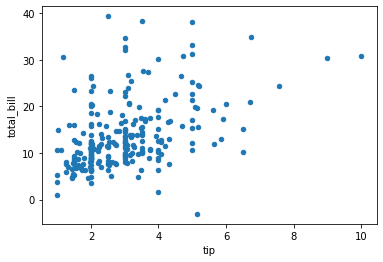

In [46]:
df.plot.scatter("tip","total_bill");

In [47]:
# Varsayım kontrolü

In [48]:
shapiro(df["tip"])

(0.897811233997345, 8.20057563521992e-12)

In [50]:
shapiro(df["total_bill"])

(0.9073188304901123, 3.808103832270149e-11)

In [51]:
# Korelasyon Katsayısı

In [52]:
df["tip"].corr(df["total_bill"]) # Bu pearson Katsayısı için

0.44362654305917865

In [53]:
df["tip"].corr(df["total_bill"],method = "spearman") # Bu Spearman Katsayısı için

0.47840852330002187

In [54]:
# Korelasyonun Anlamlılığı Testi

In [55]:
from scipy.stats.stats import pearsonr

In [57]:
pearsonr(df["tip"],df["total_bill"])

(0.443626543059179, 3.459024524905555e-13)

### Nonparametrik Hipotez Testi

In [58]:
stats.spearmanr(df["tip"],df["total_bill"]) # Ho hipotezi reddedilir

SpearmanrResult(correlation=0.47840852330002187, pvalue=2.3232643717153163e-15)

In [59]:
stats.kendalltau(df["tip"],df["total_bill"]) # Ho hipotezi reddedilir

KendalltauResult(correlation=0.3449122947279284, pvalue=2.856545457841448e-15)